### 1. Ask Meaningful Questions

Before any analysis, let’s define what we want to learn:

Do gender or race/ethnicity influence students’ performance?

Does parental education level affect student scores?

Do students who completed test preparation courses perform better?

How do math, reading, and writing scores correlate with each other?

Which subject shows the most variation in scores?

### 2. Explore the Data Structure

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/StudentsPerformance.csv')
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())



Dataset shape: (1000, 8)

First 5 rows:
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):

In [4]:
# Basic info
df.info()

# Check duplicates
print("Duplicates:", df.duplicated().sum())

# Quick look at categories
for col in df.select_dtypes(include='object').columns:
    print(f"\nUnique values in {col}:")
    print(df[col].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
Duplicates: 0

Unique values in gender:
gender
female    518
male      482
Name: count, dtype: int64

Unique values in race/ethnicity:
race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

Unique values in paren

### 3. Identify Trends, Patterns, and Anomalies

a. Summary Statistics

In [5]:
df.describe()


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


b. Distribution of Scores

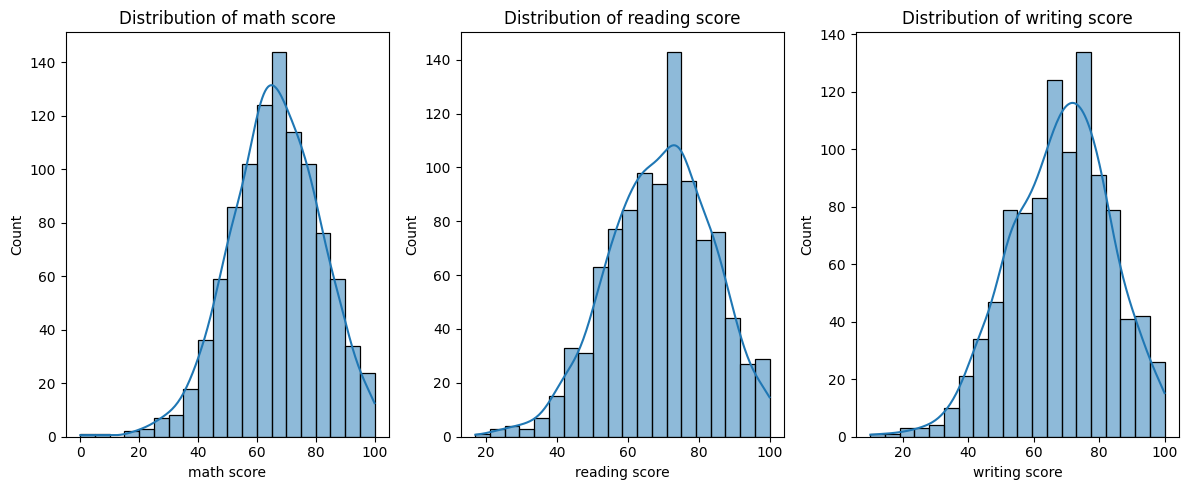

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))
for i, col in enumerate(['math score', 'reading score', 'writing score']):
    plt.subplot(1,3,i+1)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


### 4. Test Hypotheses and Validate Assumptions


a. Gender vs Scores

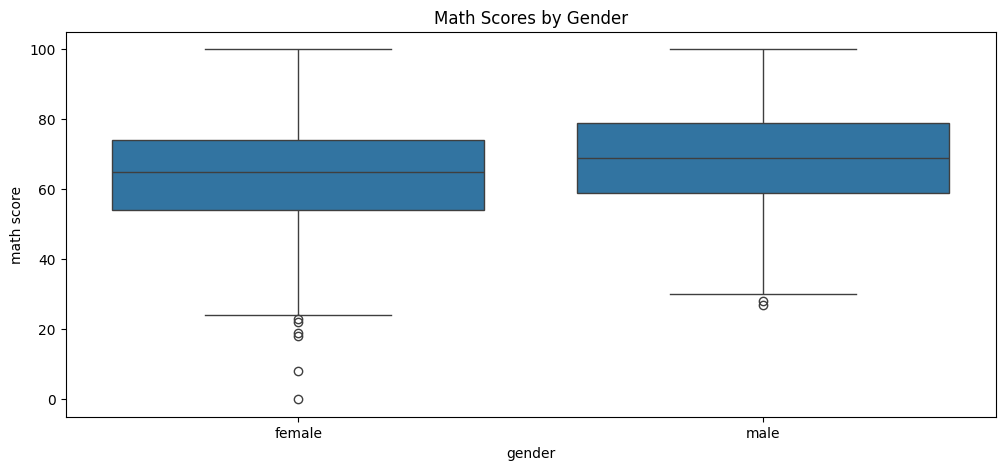

In [7]:
plt.figure(figsize=(12,5))
sns.boxplot(x='gender', y='math score', data=df)
plt.title('Math Scores by Gender')
plt.show()


b. Test Preparation Course Effect

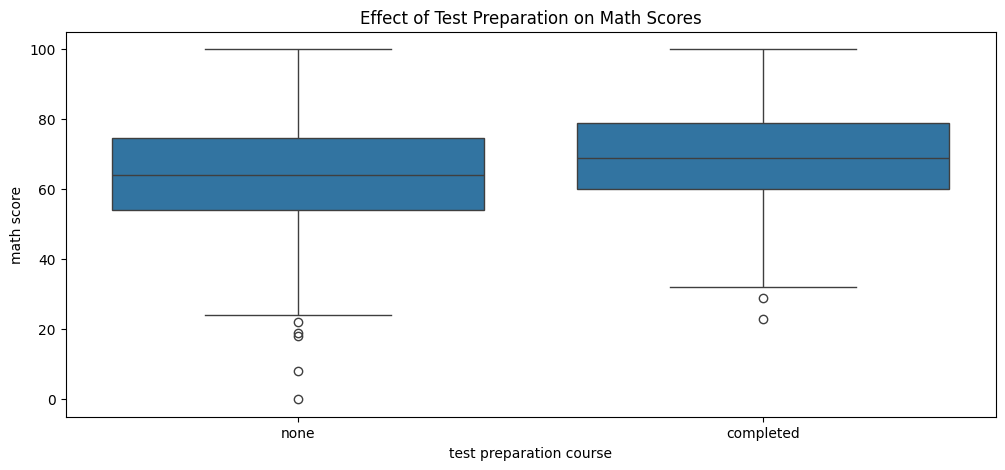

In [8]:
plt.figure(figsize=(12,5))
sns.boxplot(x='test preparation course', y='math score', data=df)
plt.title('Effect of Test Preparation on Math Scores')
plt.show()


c. Correlation Between Subjects

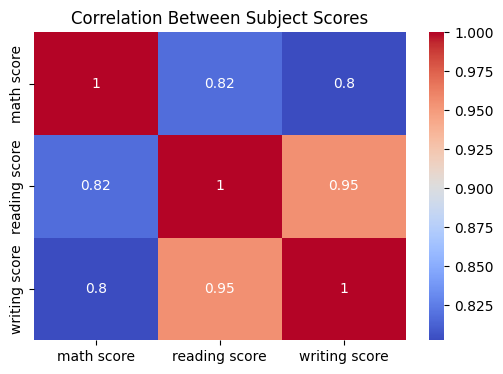

In [9]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['math score','reading score','writing score']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Subject Scores')
plt.show()


### 5. Detect Potential Data Issues

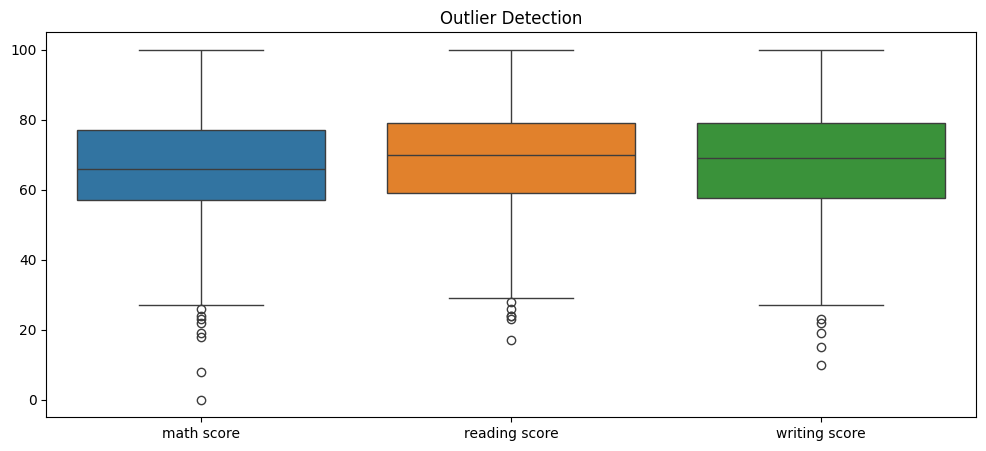

In [10]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df[['math score','reading score','writing score']])
plt.title('Outlier Detection')
plt.show()


### 6. Insights Summary

| Observation        | Insight                                                                           |
| ------------------ | --------------------------------------------------------------------------------- |
| Gender             | Females tend to perform better in reading/writing; males slightly better in math. |
| Test Prep          | Students who completed the test prep course have higher average scores.           |
| Correlations       | Strong correlation between reading and writing (~0.95).                           |
| Parental Education | Higher parental education correlates with slightly better performance.            |
| Outliers           | Few low scores; may represent unprepared students.                                |
